In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  #Untuk split data menjadi train dan test
from sklearn.metrics import accuracy_score, mean_squared_error            
from sklearn.preprocessing import MinMaxScaler

# Library Model yang digunakan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

In [2]:
df = pd.read_csv("6. Bankloan.csv")
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [3]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


## Data Splitting

In [4]:
X = df[['employ','debtinc','creddebt','othdebt']]
y = df['default']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    stratify=y,
    test_size = 0.2,
    random_state = 2020)

## Data Scaling

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Select Best K

In [11]:
k = range (1,100,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)
    
    y_predict_train = knn.predict(X_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score = acc_score
        best_k = i

In [12]:
## Plotting

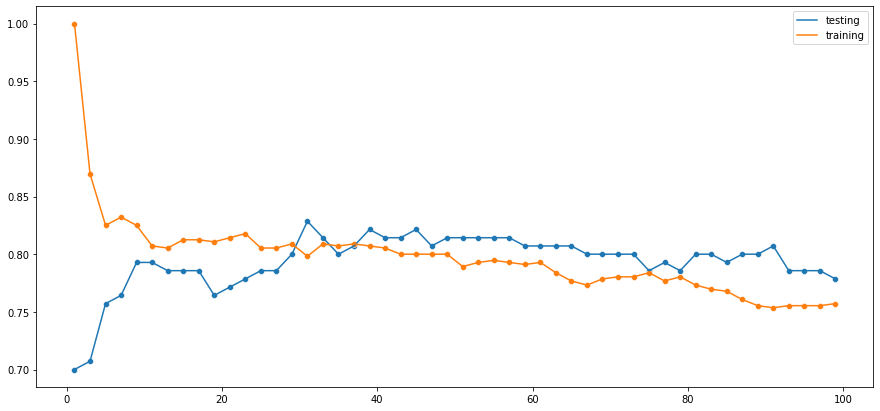

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)

plt.legend(['testing','training'])
plt.show()

Training good, testing poor = overfitting

In [21]:
print(f'best k = {best_k},\nbest score = {score}')

best k = 31,
best score = 0.8285714285714286


## Kesimpulan
* best k = 31
* best score = 82,85%
* untuk k = 1, training set pada mode knn akurasi 100%, tetapi memiliki testing score yang rendah (OVERFITTING)
* pada k < 31 ada kecenderungan model untuk OVERFITTING, sedangkan pada k > 31 ada kecenderungan UNDERFITTING (nilai akurasi testing dan training menurun)

# Model Complexity : Decision Tree Classifier

## Decision Tree Classifier

In [55]:
depth = range (1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth :
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth = i)
    dtc.fit(X_train,y_train)
    
    y_predict_train = dtc.predict(X_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = dtc.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score = acc_score
        best_depth = i

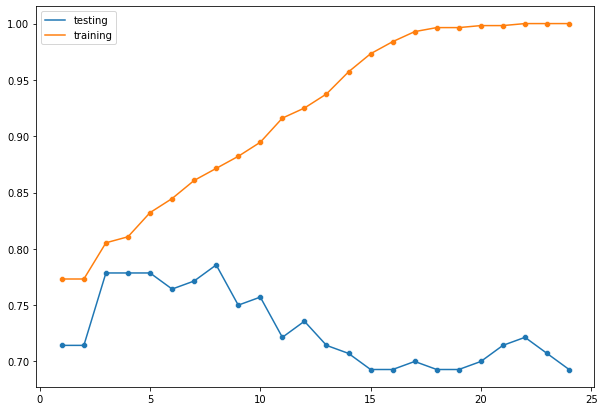

In [56]:
plt.figure(figsize=(10,7))
sns.lineplot(depth,testing_accuracy)
sns.scatterplot(depth,testing_accuracy)

sns.lineplot(depth,training_accuracy)
sns.scatterplot(depth,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [93]:
print(f'best k = {best_k}\nbest depth = {best_depth}\nbest score = {score*100}')

best k = 31
best depth = 24
best score = 78.57142857142857


## Kesimpulan
* semakin besar depth semakin overfitting karena terlalu spesifik
* depth <8 underfitting, >8 overfitting
* depth terbaik = 8, dengan nilai akurasi 78,57%

Try with another parameter
* min sample split = 2-200
* min smale leaf = 1-200
* tentukan nilai parameter terbaik, dan pada nilai parameter mana terjadi overfitting atau underfitting

In [76]:
split = range (2,200)
testing_accuracy = []
training_accuracy = []
score = 0
  
for j in split :
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth = i,min_samples_split = j)
    dtc.fit(X_train,y_train)
    
    y_predict_train = dtc.predict(X_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = dtc.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    
    if score<acc_score:
        score = acc_score
        best_split = j

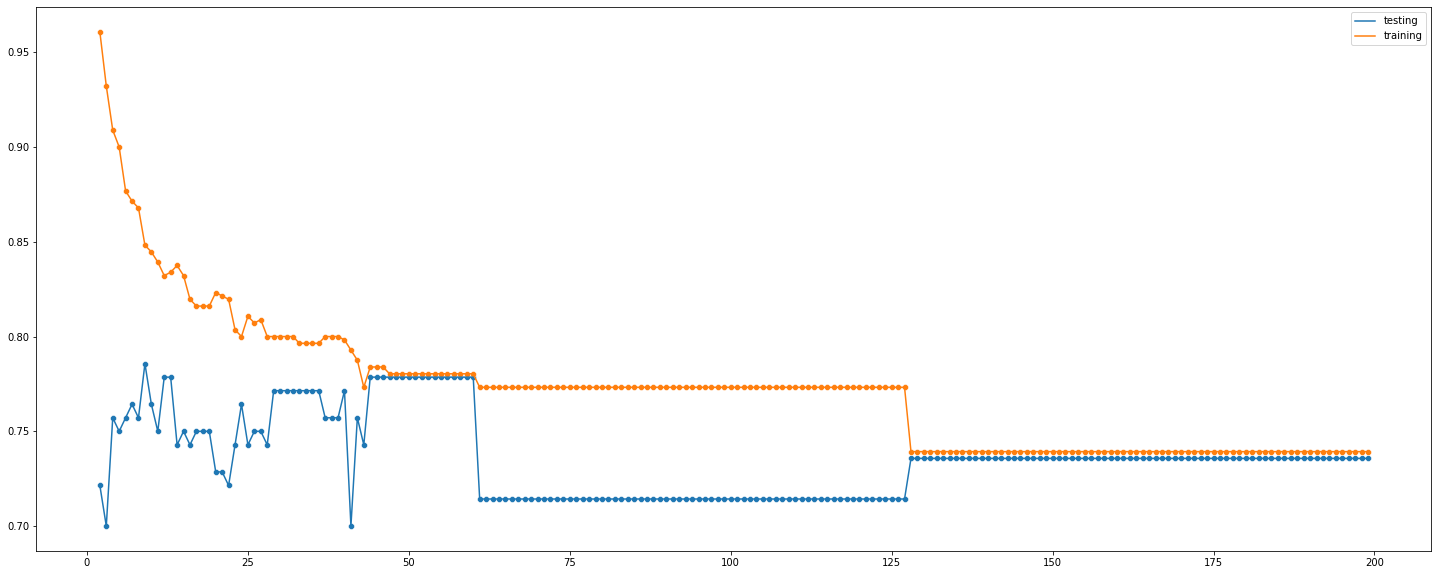

In [97]:
plt.figure(figsize=(25,10))
sns.lineplot(split,testing_accuracy)
sns.scatterplot(split,testing_accuracy)

sns.lineplot(split,training_accuracy)
sns.scatterplot(split,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [94]:
print(f'best k = {best_k}\nbest split = {best_split}\nbest score = {score*100}')

best k = 31
best split = 68
best score = 78.57142857142857


## Kesimpulan
* semakin besar depth semakin overfitting karena terlalu spesifik
* depth <68 overfitting, >68 underfitting 
* split terbaik = 68, dengan nilai akurasi 78,57%

In [87]:
leaf = range (2,200)
testing_accuracy = []
training_accuracy = []
score = 0
  
for k in split :
    dtc = DecisionTreeClassifier(criterion='entropy',min_samples_leaf = k)
    dtc.fit(X_train,y_train)
    
    y_predict_train = dtc.predict(X_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = dtc.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    
    if score<acc_score:
        score = acc_score
        best_leaf = k

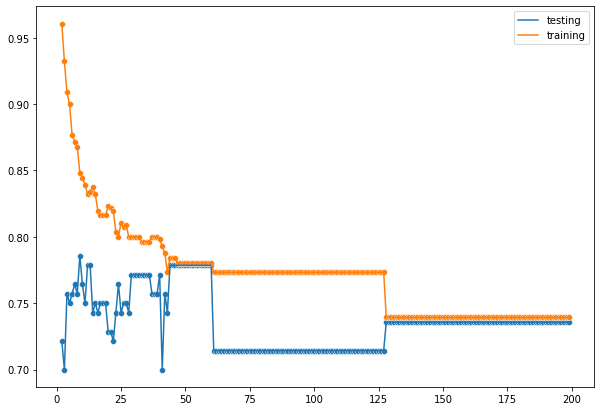

In [88]:
plt.figure(figsize=(10,7))
sns.lineplot(leaf,testing_accuracy)
sns.scatterplot(leaf,testing_accuracy)

sns.lineplot(leaf,training_accuracy)
sns.scatterplot(leaf,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [89]:
print(f'best leaf = {best_leaf}\nbest score = {score*100}')

best leaf = 9
best score = 78.57142857142857


## Kesimpulan
* semakin besar depth semakin overfitting karena terlalu spesifik
* leaf <9 overfitting, >9 underfitting 
* leaf terbaik = 9, dengan nilai akurasi 78,57%

## <center> Tugas
* Pahami cara kerja parameter min samples split dan min samples leaf
> * Min samples split = memberikan batasan pada percabangan data (semakin besar nilai semakin sedikit percabangan)
> * Min samples leaf  = memberikan batasan pada hasil percabangan data (nilai setelah dibagi) 
* Kenapa ketika nilai parameter split rendah terjadi overfitting
>* karena percabangan terlalu kompleks
* Kenapa ketika nilai parameter leaf rendah terjadi overfitting
>* karena percabangan terlalu kompleks

# <center> Generalization in Linear Model